
# Data Visualization with Matplotlib - Exercises 2

จงทำตามคำสั่งต่อไปนี้ด้วย data ที่กำหนดให้ต่อไปนี้


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## อ่านไฟล์ Superstore.csv

In [2]:
df = pd.read_csv('Superstore.csv',encoding = 'iso-8859-1')

In [3]:
df.head()

,Order ID,Customer Name,Segment,Day,Month,Year,Ship Mode,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,Darrin Van Huff,Corporate,12,6,2016,Second Class,Los Angeles,California,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Segment        9994 non-null   object 
 3   Day            9994 non-null   int64  
 4   Month          9994 non-null   int64  
 5   Year           9994 non-null   int64  
 6   Ship Mode      9994 non-null   object 
 7   City           9994 non-null   object 
 8   State          9994 non-null   object 
 9   Category       9994 non-null   object 
 10  Sub-Category   9994 non-null   object 
 11  Product Name   9994 non-null   object 
 12  Sales          9994 non-null   float64
 13  Quantity       9994 non-null   int64  
 14  Discount       9994 non-null   float64
 15  Profit         9994 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


## Exercise 1

จงวาดกราฟแท่งแสดงรายได้ของปี 2014 - 2017 และตกแต่งให้สวยงาม


In [5]:
df1 = df.groupby('Year')['Profit'].sum()
x = df1.index
y = df1

Text(0.5, 1.0, 'Profit')

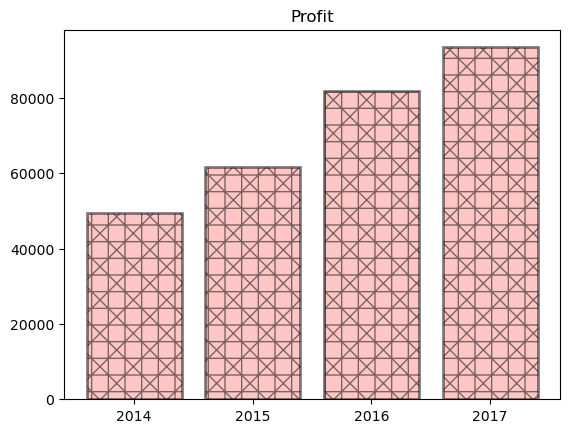

In [6]:
plt.bar(x,y,color = '#FF8F8F' ,alpha = 0.5 , hatch = '\/-|'
       ,lw = 2 ,ec = 'k', ls='-')
plt.xticks([2014,2015,2016,2017])
plt.title('Profit')

## Exercise 2

จงวาดกราฟแท่งแสดงรายได้ของปี 2014 - 2017 ในกราฟเดียวแยกตามหมวดหมู่ พร้อมตกแต่งให้สวยงาม

In [7]:
arr_df = {}
for i in range(0,df['Category'].nunique()) :
    arr_df[df['Category'].unique()[i]] = df[ df['Category'] == df['Category'].unique()[i] ].groupby('Year').sum()['Profit']

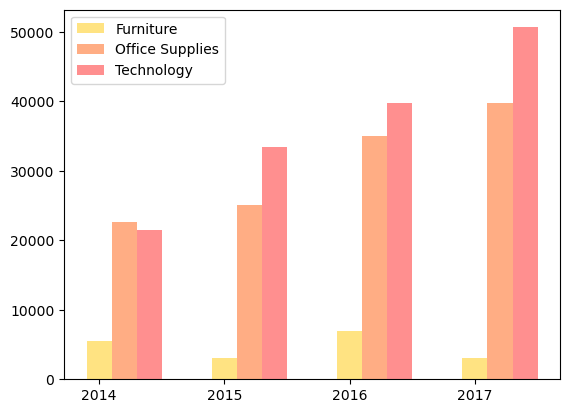

In [8]:
arr_df = {}
for i in range(0,df['Category'].nunique()) :
    arr_df[df['Category'].unique()[i]] = df[ df['Category'] 
        == df['Category'].unique()[i] ].groupby('Year').sum()['Profit']
    
bw=0.2

plt.bar(x,arr_df["Furniture"],color = '#FFE382',width=bw,label='Furniture')
plt.bar(x+bw,arr_df["Office Supplies"],color = '#FFAD84',width=bw,
        label='Office Supplies')
plt.bar(x+2*bw,arr_df["Technology"],color = '#FF8F8F',width=bw,
        label='Technology')
plt.xticks(np.arange(2014,2018,1))
plt.legend(loc='best')

## Exercise 3

จงวาดกราฟวงกลม แสดงเปอร์เซ็นต์การขนส่งแต่ละแบบ ( Ship Mode ) พร้อมตกแต่งให้สวยงาม

In [9]:
lb = df['Ship Mode'].unique()
data = df.groupby('Order ID')['Ship Mode'].unique().value_counts()
print(data)

Ship Mode
[Standard Class]    2994
[Second Class]       964
[First Class]        787
[Same Day]           264
Name: count, dtype: int64


In [10]:
data = df.groupby(['Order ID','Ship Mode']).count()
                        .index.get_level_values(1).value_counts()
data

IndentationError: unexpected indent (1086973322.py, line 2)

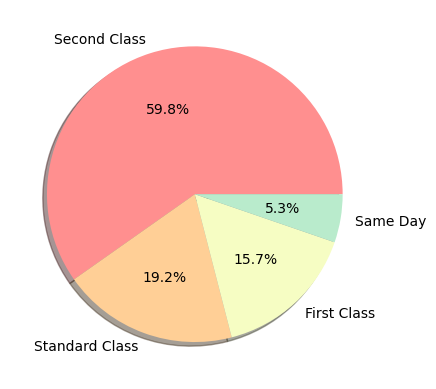

In [11]:
color = ['#FF8F8F','#FFCF96','#F6FDC3','#B9EBCC']
plt.pie(data, labels = lb, shadow = True, autopct = "%.1f%%" , 
        colors = color)
plt.show()

## Exercise 4

จงวาดกราฟความถี่ แสดงจำนวนการขนส่งแต่ละแบบ ( Ship Mode ) พร้อมตกแต่งให้สวยงาม

(array([2994.,    0.,    0.,  964.,    0.,    0.,  787.,    0.,    0.,
         264.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

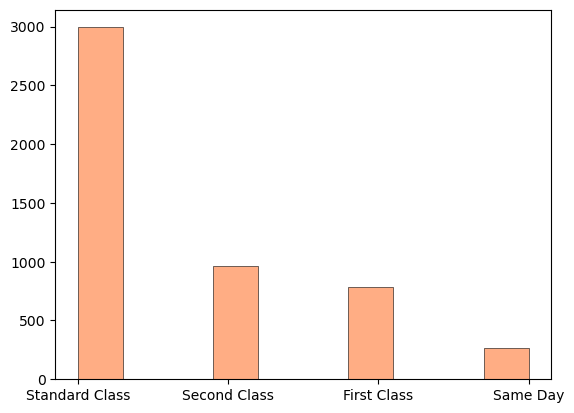

In [12]:
orderIdShipMode = pd.DataFrame({'Order ID':df['Order ID'],
                                'Ship Mode':df['Ship Mode']})
callased_df = orderIdShipMode.groupby('Order ID').first().reset_index()
plt.hist(callased_df['Ship Mode'],color = '#FFAD84',ec='k' ,lw = 0.4)

(array([1945.,    0.,    0., 5968.,    0.,    0., 1538.,    0.,    0.,
         543.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

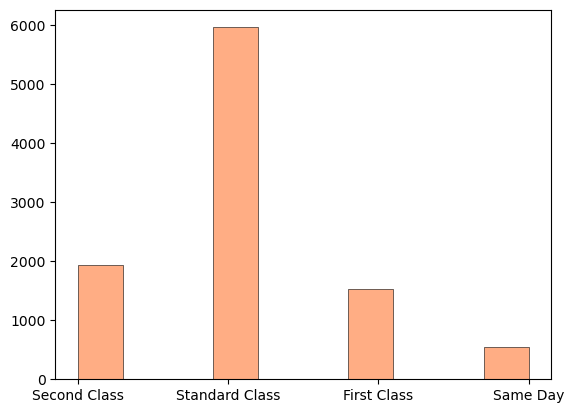

In [13]:
data = df['Ship Mode']
plt.hist(data,color = '#FFAD84',ec='k' ,lw = 0.4)

## Exercise 5

จงวาดกราฟจุด(Scatter) แสดงราคาขายกับกำไรที่ได้ (Sales , Profit) พร้อมตกแต่งให้สวยงาม

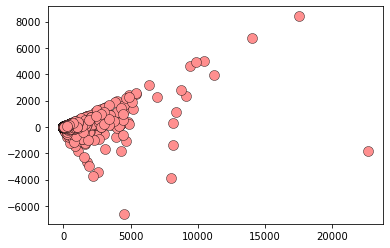

In [88]:
x = df['Sales']
y = df['Profit']
plt.scatter(x,y,marker = 'o',c = '#FF8F8F' ,s = 100 ,ec = 'k' ,lw = 0.4)